Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.2674 - loss: 1.3812 - val_accuracy: 0.4549 - val_loss: 1.1441
Epoch 2/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.5917 - loss: 0.8900 - val_accuracy: 0.8024 - val_loss: 0.5304
Epoch 3/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8729 - loss: 0.3428 - val_accuracy: 0.8055 - val_loss: 0.4837
Epoch 4/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9404 - loss: 0.1623 - val_accuracy: 0.8227 - val_loss: 0.5132
Epoch 5/5
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9651 - loss: 0.0983 - val_accuracy: 0.8166 - val_loss: 0.5973
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


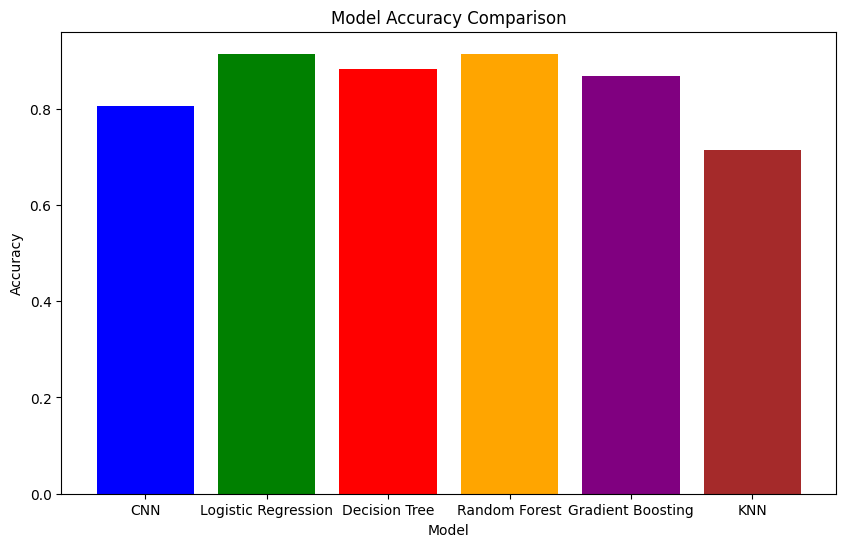

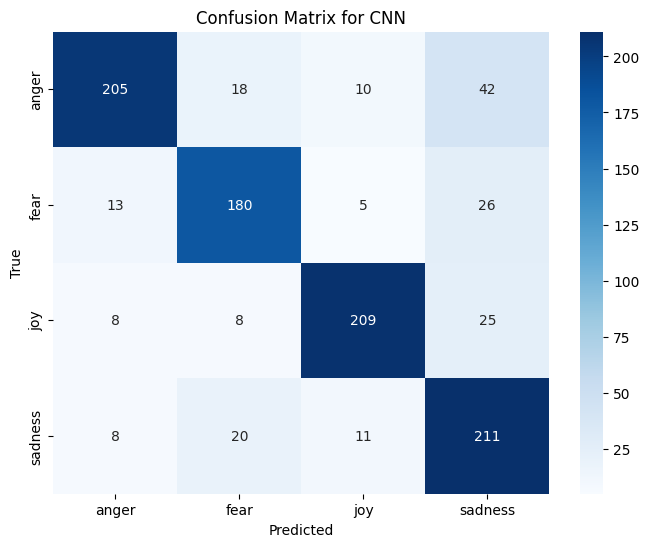

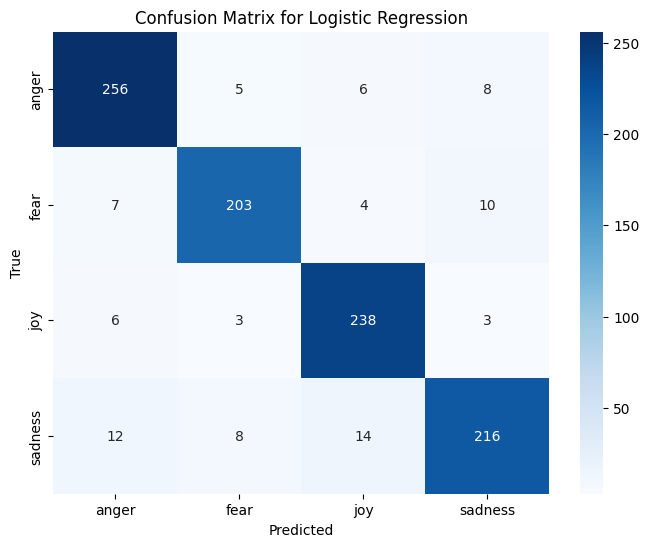

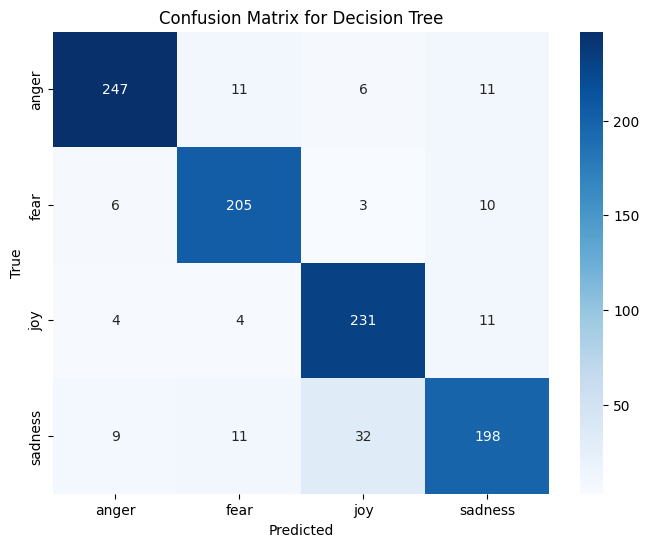

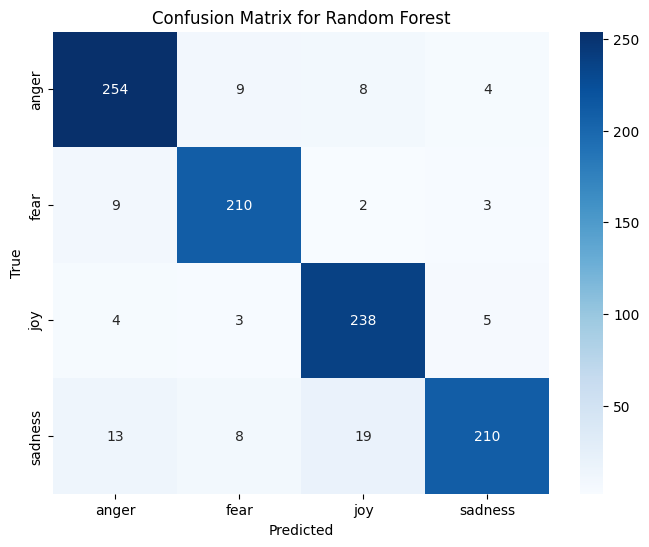

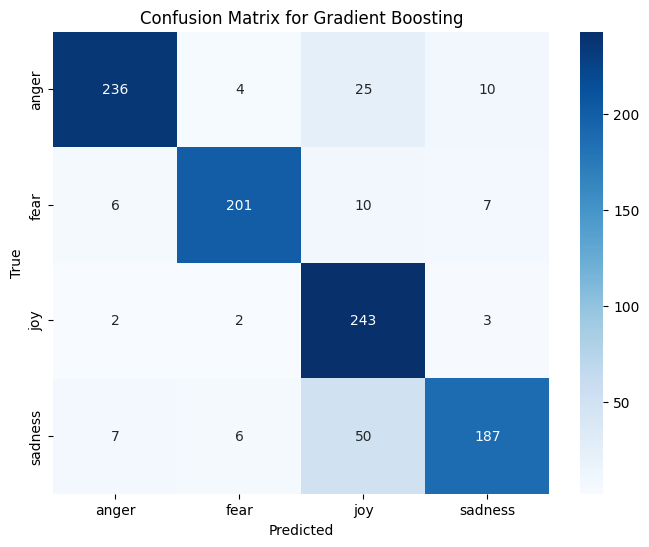

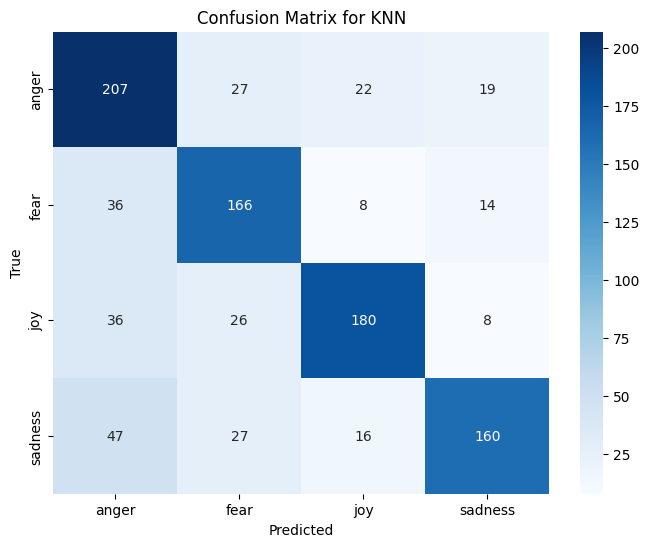


Classification Report - CNN:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       275
           1       0.80      0.80      0.80       224
           2       0.89      0.84      0.86       250
           3       0.69      0.84      0.76       250

    accuracy                           0.81       999
   macro avg       0.81      0.81      0.81       999
weighted avg       0.82      0.81      0.81       999


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       275
           1       0.93      0.91      0.92       224
           2       0.91      0.95      0.93       250
           3       0.91      0.86      0.89       250

    accuracy                           0.91       999
   macro avg       0.91      0.91      0.91       999
weighted avg       0.91      0.91      0.91       999


Classification Report - Decision Tree:
              

In [3]:
# Fix: Clear Keras/TensorFlow backend before importing to avoid re-registration error
import gc
try:
    import keras.backend as K
    K.clear_session()
except:
    pass
gc.collect()

# Required Libraries
import pandas as pd
import numpy as np
import tensorflow  as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to data
train_path = "/content/drive/MyDrive/daup test/train.txt"
val_path = "/content/drive/MyDrive/daup test/val.txt"
test_path = "/content/drive/MyDrive/daup test/test.txt"

# Read and Preprocess data
df = pd.read_csv(train_path, delimiter=';', header=None, names=['sentence', 'label'])
val_df = pd.read_csv(val_path, delimiter=';', header=None, names=['sentence', 'label'])
ts_df = pd.read_csv(test_path, delimiter=';', header=None, names=['sentence', 'label'])

# Remove unwanted classes
df = df[~df['label'].str.contains('love|surprise')]
val_df = val_df[~val_df['label'].str.contains('love|surprise')]
ts_df = ts_df[~ts_df['label'].str.contains('love|surprise')]

# Balance training set
joy = df[df['label'] == 'joy'].sample(n=2200, random_state=20)
sad = df[df['label'] == 'sadness'].sample(n=2200, random_state=20)
fear = df[df['label'] == 'fear'].sample(n=1937, random_state=20)
anger = df[df['label'] == 'anger'].sample(n=2159, random_state=20)
df_sampled = pd.concat([joy, sad, fear, anger])
df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

# Balance validation set
joy = val_df[val_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['label'] == 'anger'].sample(n=275, random_state=20)
df_sampled = pd.concat([joy, sad, fear, anger])
val_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

# Balance test set
joy = ts_df[ts_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = ts_df[ts_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = ts_df[ts_df['label'] == 'fear'].sample(n=224, random_state=20)
anger = ts_df[ts_df['label'] == 'anger'].sample(n=275, random_state=20)
df_sampled = pd.concat([joy, sad, fear, anger])
ts_df = df_sampled.sample(frac=1, random_state=20).reset_index(drop=True)

# Split data
tr_text = df['sentence']
tr_label = df['label']
val_text = val_df['sentence']
val_label = val_df['label']
ts_text = ts_df['sentence']
ts_label = ts_df['label']

# Encode labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
tr_label = encoder.fit_transform(tr_label)
val_label = encoder.transform(val_label)
ts_label = encoder.transform(ts_label)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

sequences = tokenizer.texts_to_sequences(tr_text)
tr_x = pad_sequences(sequences, maxlen=50)
tr_y = to_categorical(tr_label)

sequences = tokenizer.texts_to_sequences(val_text)
val_x = pad_sequences(sequences, maxlen=50)
val_y = to_categorical(val_label)

sequences = tokenizer.texts_to_sequences(ts_text)
ts_x = pad_sequences(sequences, maxlen=50)
ts_y = to_categorical(ts_label)

# CNN Model Definition
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 128, input_length=50),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(5),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train CNN model
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(tr_x, tr_y, epochs=5, batch_size=64, validation_data=(val_x, val_y))

# Non-deep learning models (Logistic Regression, Decision Tree, etc.)
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(tr_text)
X_val_tfidf = vectorizer.transform(val_text)
X_test_tfidf = vectorizer.transform(ts_text)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, tr_label)
logreg_pred = logreg_model.predict(X_test_tfidf)
logreg_accuracy = accuracy_score(ts_label, logreg_pred)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=20)
dt_model.fit(X_train_tfidf, tr_label)
dt_pred = dt_model.predict(X_test_tfidf)
dt_accuracy = accuracy_score(ts_label, dt_pred)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=20)
rf_model.fit(X_train_tfidf, tr_label)
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(ts_label, rf_pred)

# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(random_state=20)
gbm_model.fit(X_train_tfidf, tr_label)
gbm_pred = gbm_model.predict(X_test_tfidf)
gbm_accuracy = accuracy_score(ts_label, gbm_pred)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, tr_label)
knn_pred = knn_model.predict(X_test_tfidf)
knn_accuracy = accuracy_score(ts_label, knn_pred)

# CNN Model Evaluation
cnn_pred = cnn_model.predict(ts_x)
cnn_pred = np.argmax(cnn_pred, axis=1)
cnn_accuracy = accuracy_score(ts_label, cnn_pred)

# Accuracy Plot
accuracy_dict = {
    'CNN': cnn_accuracy,
    'Logistic Regression': logreg_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gbm_accuracy,
    'KNN': knn_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=['blue', 'green', 'red', 'orange', 'purple', 'brown'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Confusion Matrix and Heatmaps
models = ['CNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN']
predictions = [cnn_pred, logreg_pred, dt_pred, rf_pred, gbm_pred, knn_pred]

for model_name, pred in zip(models, predictions):
    cm = confusion_matrix(ts_label, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Classification report
for model_name, pred in zip(models, predictions):
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(ts_label, pred))


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
